In [ ]:
import os
import pandas as pd
import numpy as np
import tarfile
import matplotlib.pyplot as plt

import re
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
# Extract the dataset
tar = tarfile.open("/content/drive/MyDrive/datasets/20_newsgroups.tar.gz")
tar.extractall()
tar.close()

In [ ]:
# Define the directory containing the extracted dataset
dataset_dir = "./20_newsgroups"

# Initialize variables to count observations, newsgroups, and files
total_observations = 0
total_newsgroups = 0
observations_per_group = {}

# Traverse through the directory structure
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    # Check if the category is a directory (newsgroup)
    if os.path.isdir(category_path):
        total_newsgroups += 1
        # Count the number of files (observations) in each newsgroup
        category_files = os.listdir(category_path)
        num_observations = len(category_files)
        observations_per_group[category] = num_observations
        # Increment the total number of observations
        total_observations += num_observations

# Calculate the size of the data
data_size = sum(os.path.getsize(os.path.join(root, file))
                for root, _, files in os.walk(dataset_dir)
                for file in files)

# Print the summary statistics
print("Total number of observations:", total_observations)
print("\nTotal number of newsgroups:", total_newsgroups)
print("\nNumber of observations per newsgroup:")
for group, num_observations in observations_per_group.items():
    print(f"{group}: {num_observations}")
print("\nSize of the data (in bytes):", data_size)

Total number of observations: 19997

Total number of newsgroups: 20

Number of observations per newsgroup:
talk.religion.misc: 1000
sci.space: 1000
rec.sport.baseball: 1000
alt.atheism: 1000
sci.med: 1000
comp.windows.x: 1000
rec.sport.hockey: 1000
sci.electronics: 1000
talk.politics.guns: 1000
rec.autos: 1000
comp.sys.ibm.pc.hardware: 1000
sci.crypt: 1000
comp.graphics: 1000
misc.forsale: 1000
comp.sys.mac.hardware: 1000
talk.politics.mideast: 1000
rec.motorcycles: 1000
talk.politics.misc: 1000
comp.os.ms-windows.misc: 1000
soc.religion.christian: 997

Size of the data (in bytes): 46132928


This balanced distribution ensures that there is no bias towards any particular category during the analysis.

In [ ]:
# Initialize an empty list to store newsgroups and content
data = []

# Traverse through the directory structure
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    # Iterate through files in each category
    for file_name in os.listdir(category_path):
        file_path = os.path.join(category_path, file_name)
        # Read the content of the file
        with open(file_path, 'r', errors='ignore') as file:
            content = file.read()
            # Append newsgroup and content to the list
            data.append((category, content))

# Create a DataFrame from the list of newsgroups and content
df = pd.DataFrame(data, columns=['Newsgroup', 'Content'])
df

Newsgroup  \
0          talk.religion.misc   
1          talk.religion.misc   
2          talk.religion.misc   
3          talk.religion.misc   
4          talk.religion.misc   
...                       ...   
19992  soc.religion.christian   
19993  soc.religion.christian   
19994  soc.religion.christian   
19995  soc.religion.christian   
19996  soc.religion.christian   

                                                 Content  
0      Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  
1      Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  
2      Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  
3      Newsgroups: talk.religion.misc\nPath: cantalou...  
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  
...                                                  ...  
19992  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  
19993  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  
19994  Xref: cantaloupe.srv.cs.cmu.edu soc.religion.c...  
19995  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  
19996  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  

[19997 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Newsgroup  19997 non-null  object
 1   Content    19997 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
df.isnull().sum()

Newsgroup    0
Content      0
dtype: int64

In [ ]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (19997, 2)


In [ ]:
print(df["Content"][8500])

Newsgroups: talk.politics.guns
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!gatech!swrinde!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!infonode!ingr!dazixcon!hound!crphilli
From: crphilli@hound.dazixca.ingr.com (Ron Phillips)
Subject: Re: Armed Citizen - April '93
Message-ID: <1993Apr16.152429.8885@dazixco.ingr.com>
Sender: news@dazixco.ingr.com
Nntp-Posting-Host: hound
Reply-To: crphilli@hound.dazixca.ingr.com
Organization: "Intergraph Electronics, Mountain View, CA"
References: <1993Apr5.164728.10847@dazixco.ingr.com> <1993Apr13.162304.16721@lds.loral.com>
Distribution: usa
Date: Fri, 16 Apr 1993 15:24:29 GMT
Lines: 30

In article <1993Apr13.162304.16721@lds.loral.com>, kendall@lds.loral.com (Colin Kendall 6842) writes:
|> In article <1993Apr5.164728.10847@dazixco.ingr.com> crphilli@hound.dazixca.ingr.com writes:
|> >
|> >THE ARMED CITIZEN
|> >+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
|> >Mere presence of a f

In [ ]:
def preprocess_text(text):
    # Remove metadata headers
    text = re.sub(r'^.*?:.*?\n', '', text, flags=re.MULTILINE)

    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove 'GMT'
    text = re.sub(r'GMT', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing Punctuation and non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]

    # Remove single characters
    tokens = [token for token in tokens if len(token) > 1]

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

- Remove metadata headers: Metadata headers are removed using regular expressions. This step removes lines that start with any characters followed by a colon and any characters until a newline character \n. This is used to remove headers like "From:", "Subject:", etc.

- Remove emails: It matches any sequence of non-whitespace characters followed by an "@" symbol and then again any sequence of non-whitespace characters. This helps in removing email addresses which may not be relevant for text analysis.

- Remove numbers: Regular expression \d+ is used to match and remove any sequence of digits from the text. This is done to remove numerical digits which may not be relevant for text analysis or could introduce noise.

- Remove 'GMT': The string 'GMT' is removed from the text. This is done to remove timestamps or time zone indicators which may not be relevant for text analysis.

- Tokenization: The text is tokenized into individual words using the word_tokenize function from the NLTK library. Tokenization is the process of splitting text into smaller units, such as words or phrases.

- Lowercasing: All tokens are converted to lowercase using list comprehension. This ensures that words are treated consistently regardless of their original casing.

- Removing Punctuation and non-alphabetic characters: Tokens that contain only alphabetic characters are retained, while tokens containing any non-alphabetic characters (such as punctuation marks) are removed. This step helps in removing noise from the text data.

- Remove single characters: Tokens with a length of 1 (single characters) are removed. This is done to filter out single letters or other very short words that may not carry much semantic meaning.

- Removing Stopwords: Stopwords, which are commonly occurring words that do not carry much significance (e.g., 'the', 'is', 'and'), are removed from the tokens using a predefined set of stopwords from the NLTK library.

- Lemmatization: Each token is lemmatized using WordNetLemmatizer from NLTK, which reduces words to their base or dictionary form. This helps in standardizing tokens and reducing the dimensionality of the feature space.

- Join tokens back into a string: Finally, the preprocessed tokens are joined back into a single string, separated by whitespace, and returned as the preprocessed text.

Overall, these preprocessing steps aim to clean and standardize the text data, making it more suitable for text analysis tasks such as classification or clustering.

In [ ]:
# Apply preprocessing function to the 'Content' column
df['Content'] = df['Content'].apply(preprocess_text)

In [ ]:
df["Content"][1500]

'actually advisor another classmate mine talking day putting one detector one pluto satellite realized satellite alone carrying something like pound eq well batse detector need lead shielding protect alone weighs pound actually situation even worse total mass pluto fast flyby spacecraft ish pound support equipment like power communication mass available instrument maybe think batse fit pluto fast flyby instrument definition research anouncemnet mass allocation kilogram lb power allocation watt visible imaging system ccd mm fl optic ir mapping spectrometer hgcdte array energy resolution uv spectrometer nm nm resolution radio science ultrastable oscilator incorporated telecom system ultrastable mean leave much room payload totally unrelated mission spacecraft addition power come radioisotope thermal generator whole space craft foot diameter boom mean strong associated schmutz background tends reduce sensitivity somewhat would still nice group goddard looking david palmer'

In [ ]:
df["Content"][100]

'highly christian religious order put fire house killing people inside annoyed adult knew supposedly action mostly angry fact people inside including mother let child suffer die awful condition considered religious following end proud follow fanatical religion might want die whatever purpose please spare innocent young one nothing hard time understanding christianity know word compassion christian think action today would produce good picture religion kent'

In [ ]:
df["Content"][880]

'check news today ap authority also found automatic machine gun investigator know cult arsenal carl stern justice department yeah fire reportedly burned hotter degree hot enough make body still unidentifiable authority found gun recognizably state art conveeeenient matthew russotto say police search seizure make use force responsible bodily harm resulting following advice'

In [ ]:
df["Content"][8000]

'horror story fbi ruining guy life hell omitted batf fundamental fact friend real story work fiction source newspaper get hypothetical pay enough create long work fiction reading amusement text excerpted appeared nra official journal march full text article available anonymous ftp believe file name lawmaster cheap shot cynic blow source biased nra publication local news medium choose report incident failure intellectually honest check story independently enough name date location provided neighbor also witnessed batf behavior one warning may may get anywhere attempting research lawmaster attorney went courthouse obtain copy affidavit supporting search warrant could determine whether probable cause issuance warrant told court official attorney asked affidavit sealed sealed warrant hm heard lately followup believe speak company write today special investor packet'

In [ ]:
df["Content"][18500]

'computer supplied name mix upper lower case workplace getting fed unversity took phone call supplier get computer working really ca face tackling chris'

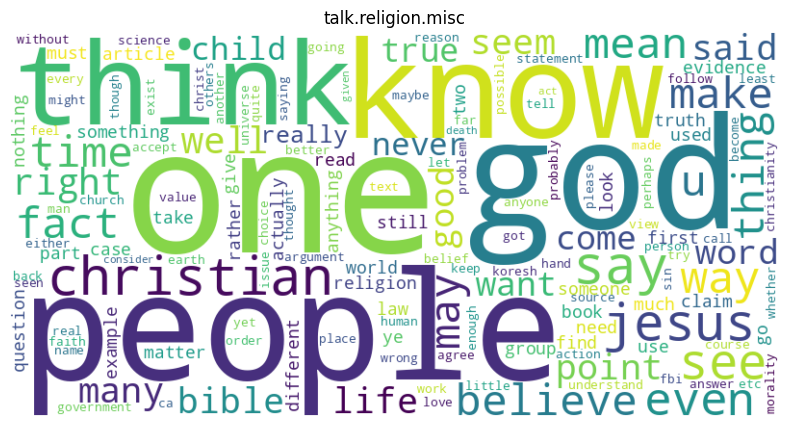

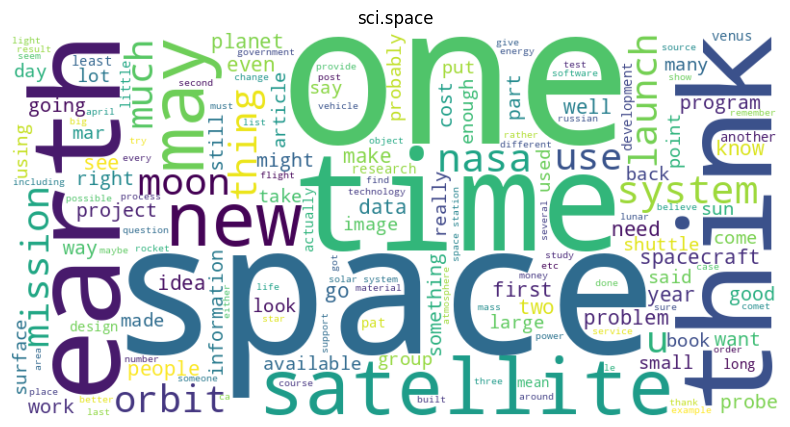

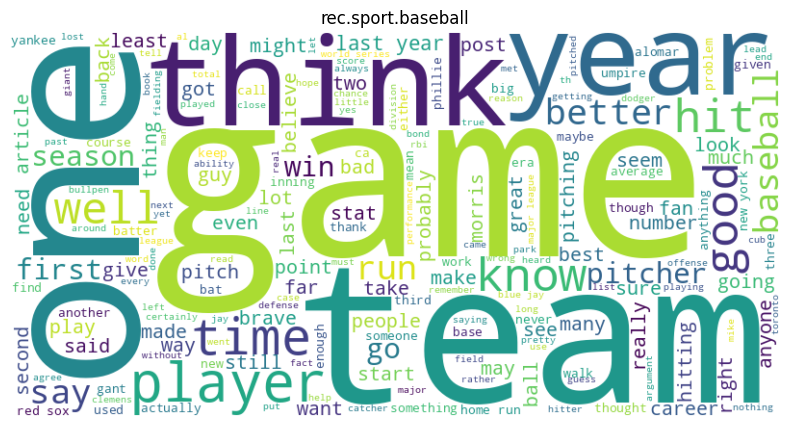

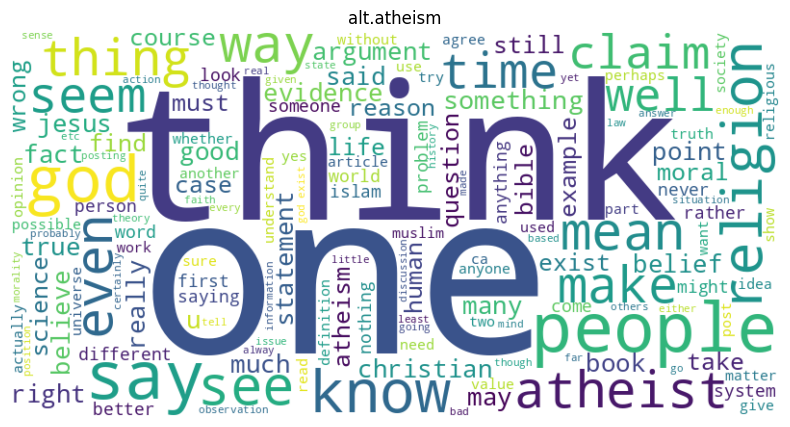

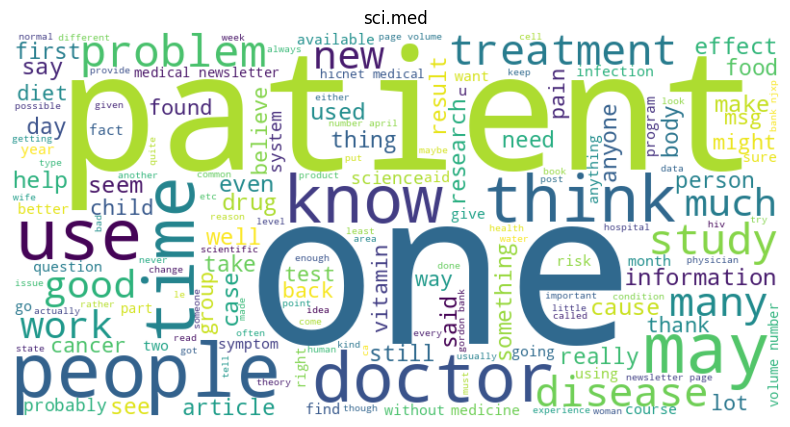

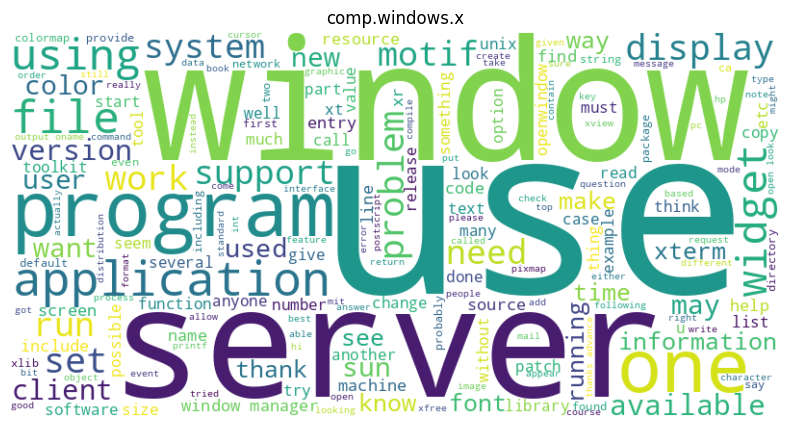

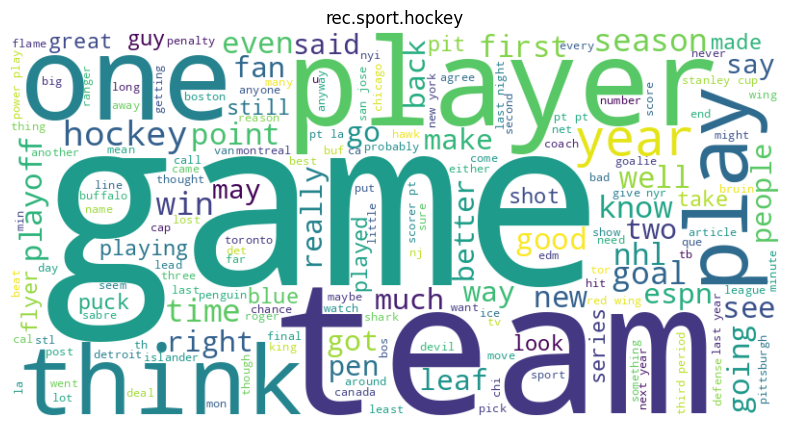

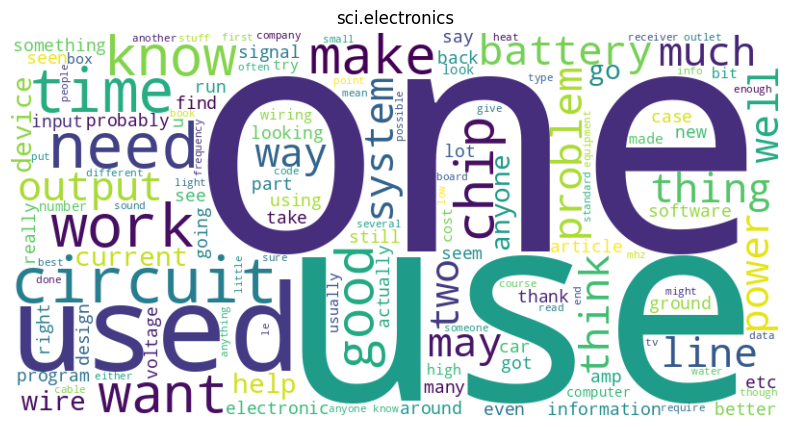

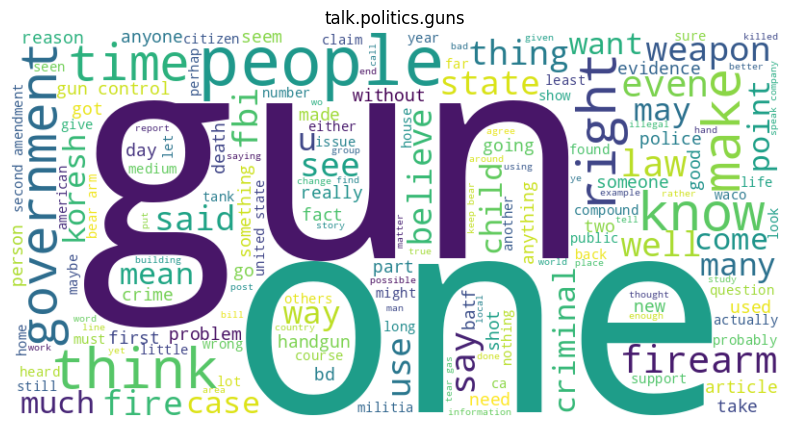

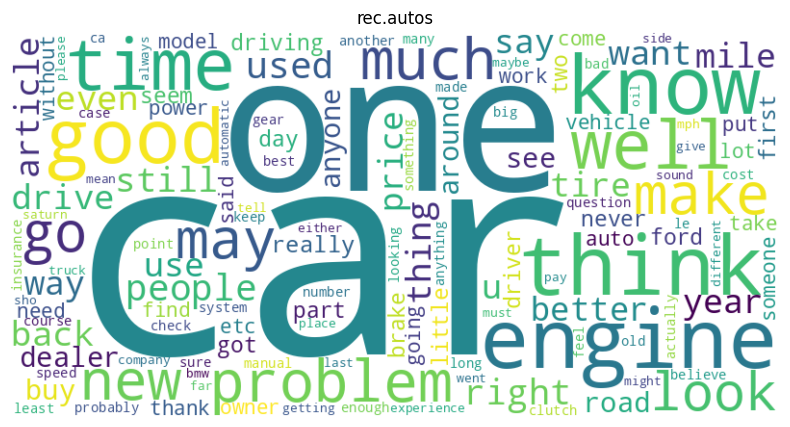

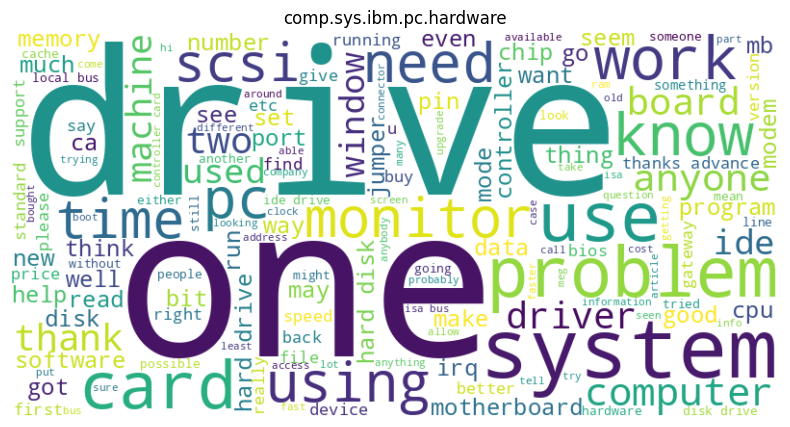

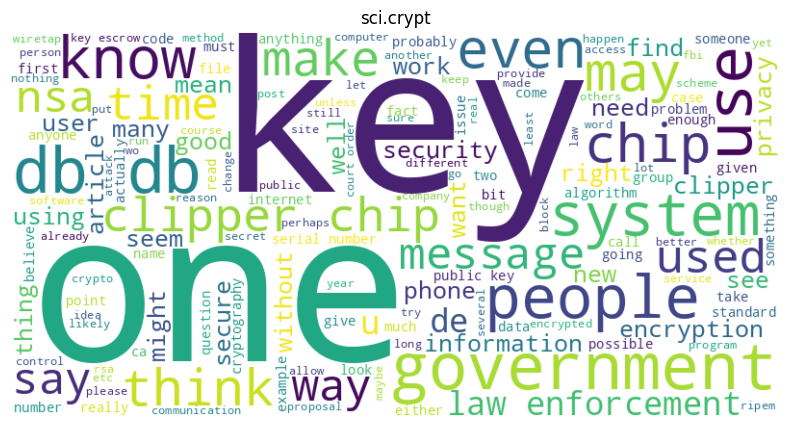

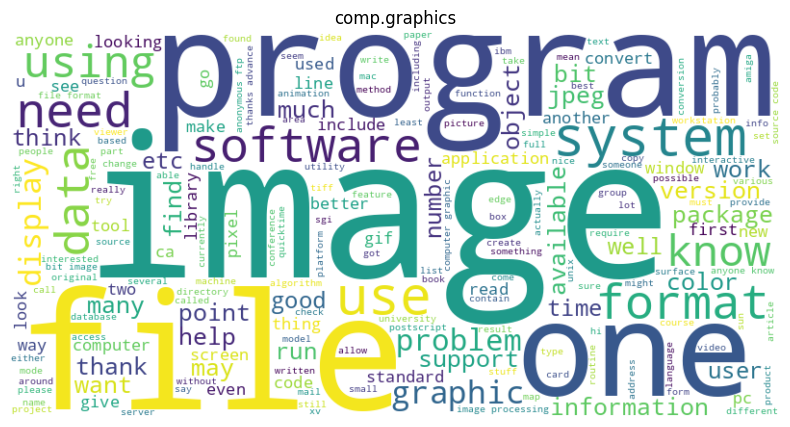

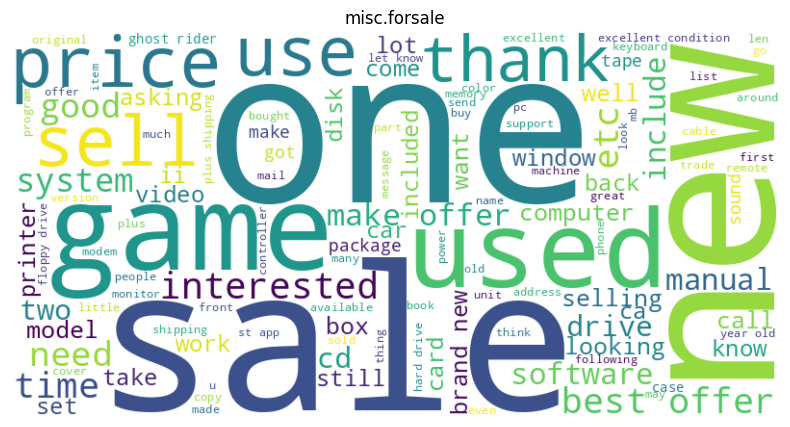

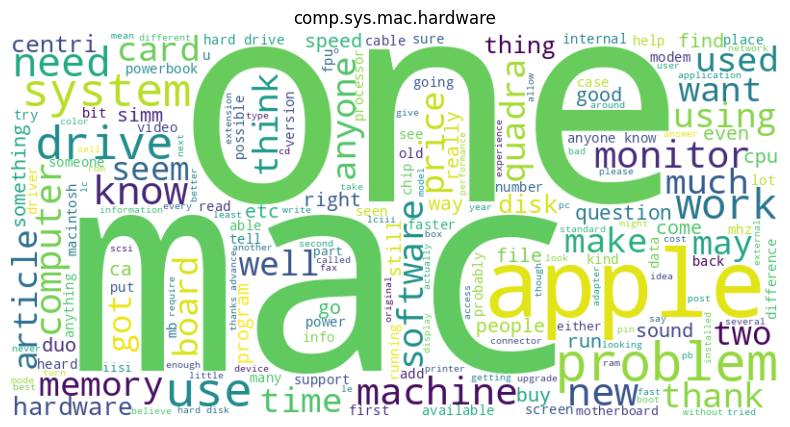

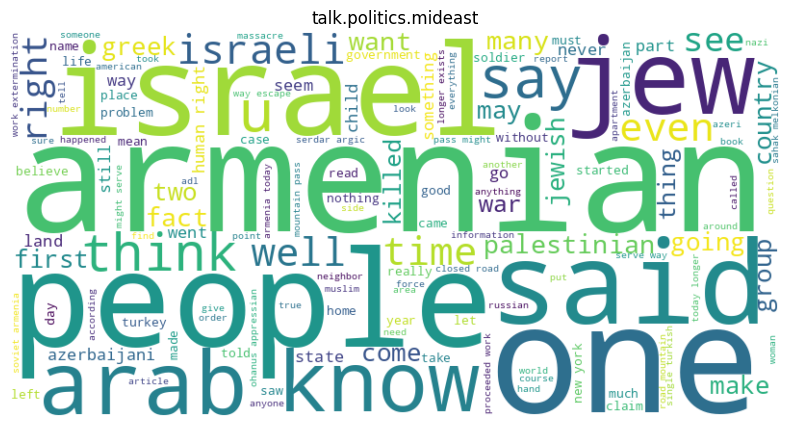

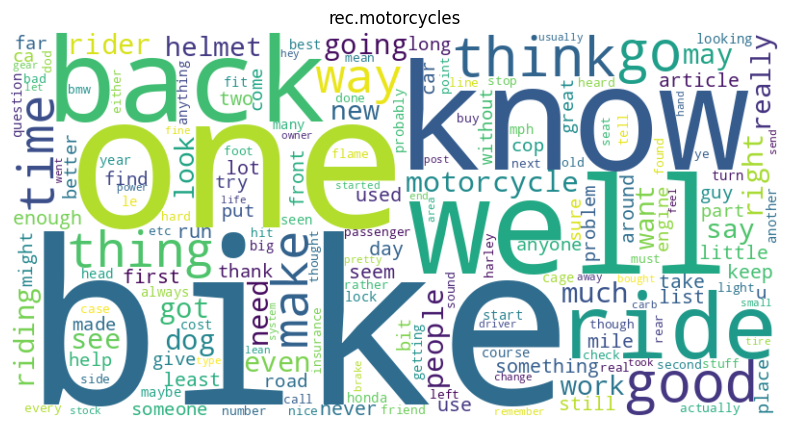

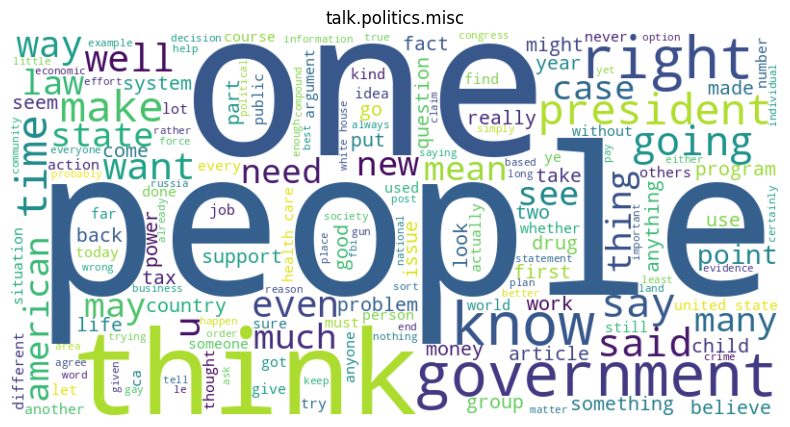

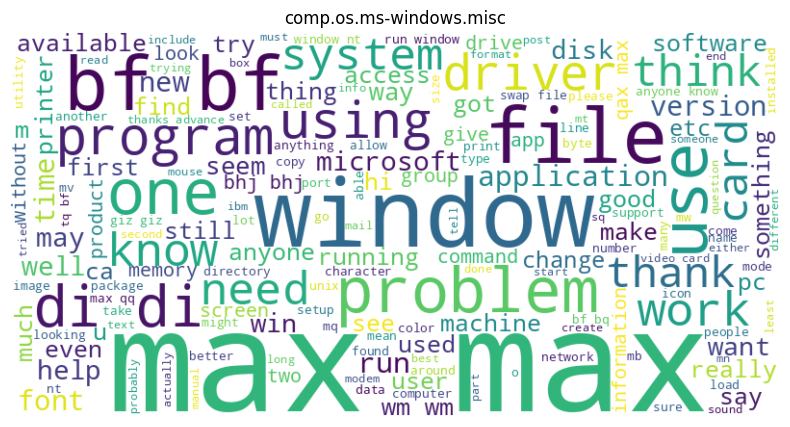

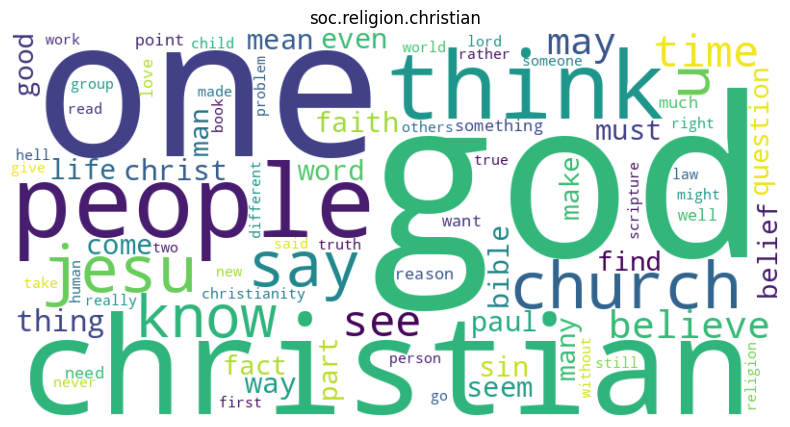

In [ ]:
# Generate WordCloud for each Newsgroup
for group in df['Newsgroup'].unique():
    text = ' '.join(df[df['Newsgroup'] == group]['Content'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(group)
    plt.axis('off')
    plt.show()

In [ ]:
df['Content'].str.len()

0        1002
1         307
2        2313
3         621
4         211
         ... 
19992     143
19993     613
19994     138
19995    1182
19996    1489
Name: Content, Length: 19997, dtype: int64

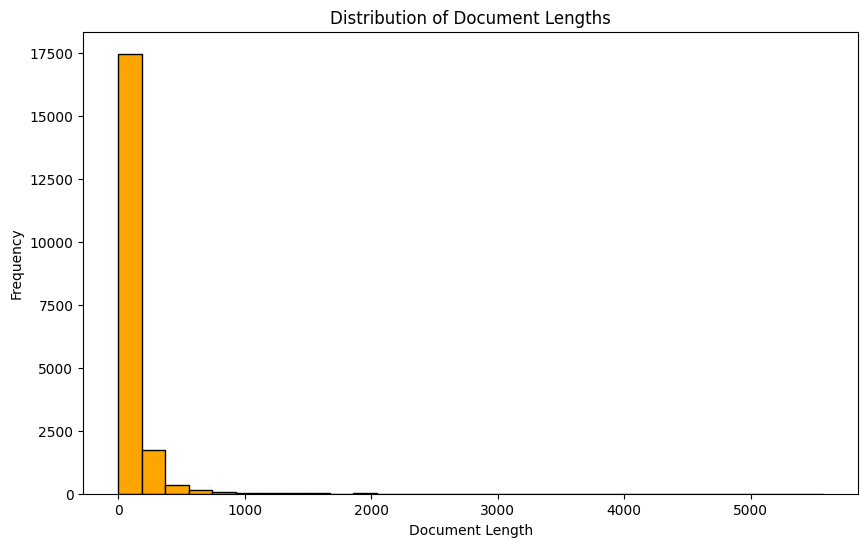

In [ ]:
df['Document Length'] = df['Content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(df['Document Length'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
word_counter = Counter()
for content in df['Content']:
    words = content.split()
    word_counter.update(words)

most_common_words = word_counter.most_common(20)
print("Most Common Words:", most_common_words)

Most Common Words: [('would', 16216), ('one', 15072), ('people', 9881), ('like', 9479), ('know', 9084), ('get', 8754), ('time', 7730), ('think', 7646), ('also', 7117), ('could', 6510), ('use', 6416), ('make', 6262), ('say', 5999), ('right', 5878), ('good', 5600), ('year', 5568), ('way', 5507), ('even', 5503), ('system', 5451), ('new', 5370)]


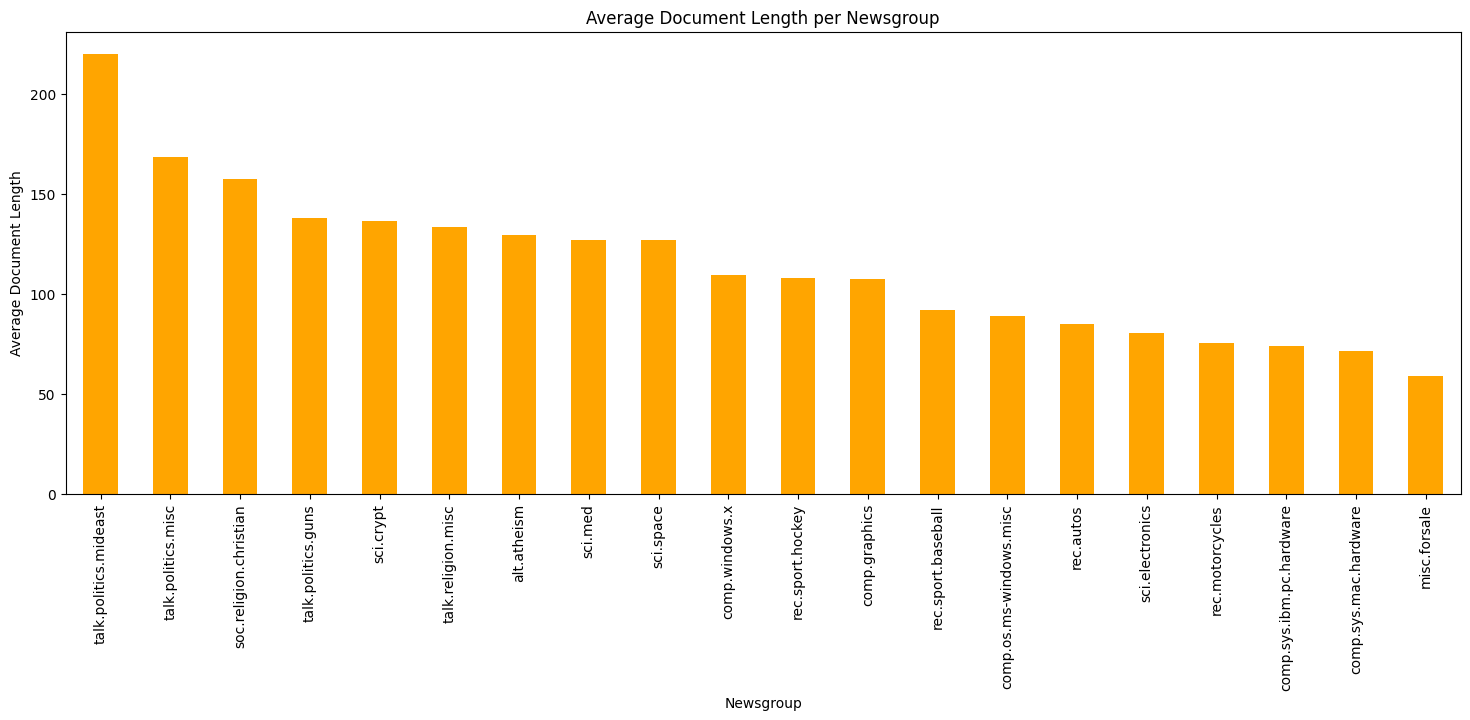

In [ ]:
avg_doc_length_per_group = df.groupby('Newsgroup')['Document Length'].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
avg_doc_length_per_group.plot(kind='bar', color='orange')
plt.title('Average Document Length per Newsgroup')
plt.xlabel('Newsgroup')
plt.ylabel('Average Document Length')
plt.xticks(rotation=90)
plt.show()